In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
metrics = pd.read_csv("/Users/oliverfox/git_repositories/nih_cxr_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_26/metrics.csv")

In [3]:
metrics

,brier_score,epoch,lr_find/suggested_lr,multilabel_f1_macro,multilabel_f1_micro,multilabel_f1_weighted,step,train_brier_Atelectasis_epoch,train_brier_Cardiomegaly_epoch,train_brier_Consolidation_epoch,...,val_brier_Mass,val_brier_No Finding,val_brier_Nodule,val_brier_Pleural_Thickening,val_brier_Pneumonia,val_brier_Pneumothorax,val_loss,val_multilabel_f1_macro,val_multilabel_f1_micro,val_multilabel_f1_weighted
0,NaN,NaN,2.754229e-07,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.233506,0.0,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,...,0.317257,0.281957,0.220267,0.313265,0.257489,0.138181,1.716105,0.101500,0.206220,0.322775
2,0.233739,0.0,NaN,0.101827,0.206269,0.322864,13,0.168845,0.185019,0.218649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.233394,1.0,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,...,0.317642,0.281684,0.221594,0.312989,0.257471,0.137137,1.813938,0.101435,0.206444,0.325137
4,0.233534,1.0,NaN,0.100733,0.206235,0.323250,27,0.167570,0.185432,0.219219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.233440,2.0,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,...,0.317589,0.281890,0.222264,0.313977,0.257585,0.136639,1.794765,0.100841,0.205912,0.323257
6,0.233498,2.0,NaN,0.100418,0.205876,0.322978,41,0.168470,0.184904,0.219257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

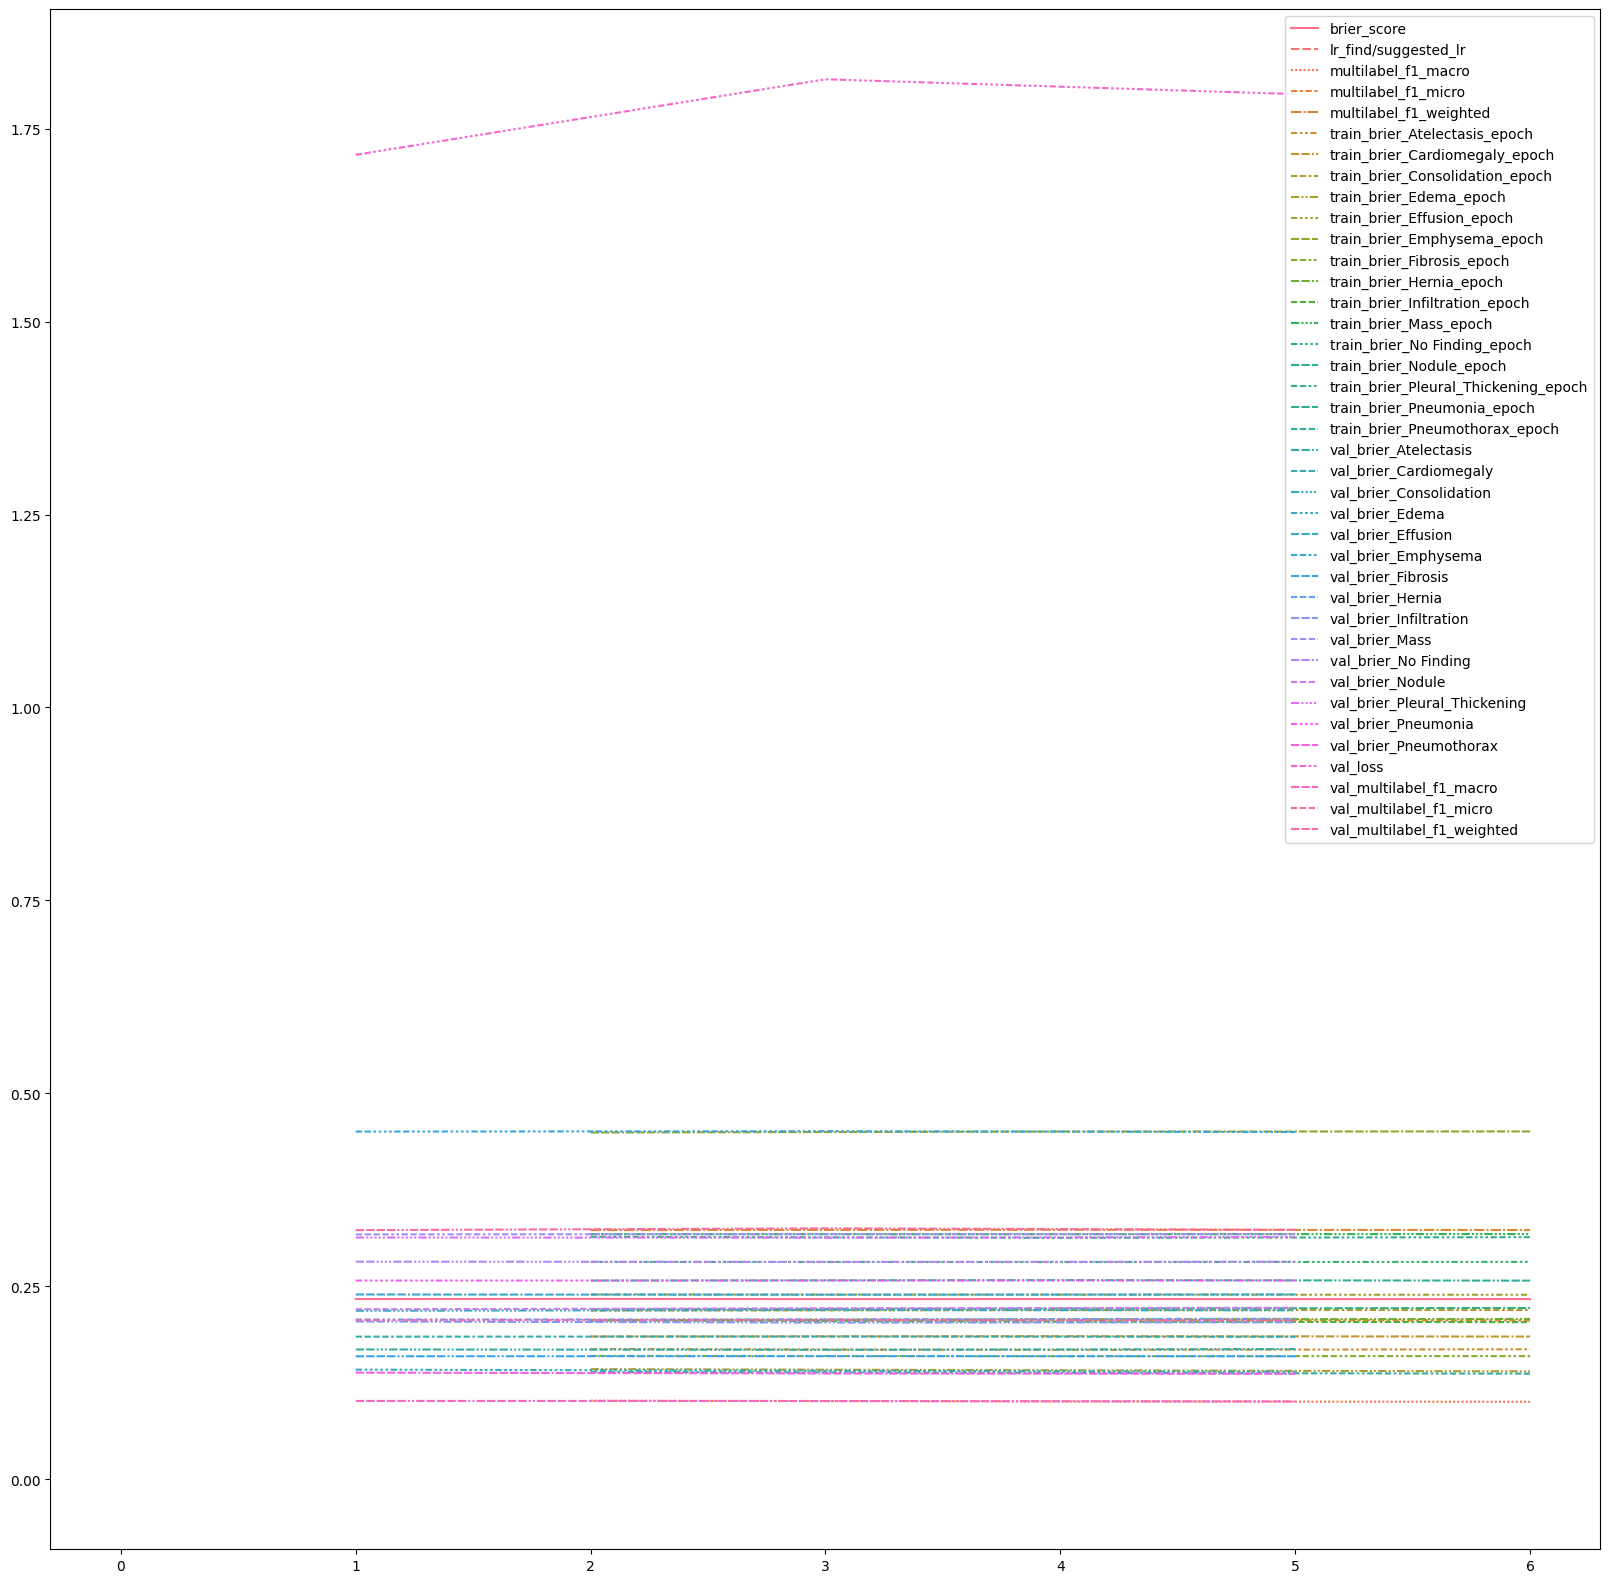

In [5]:
plt.figure(figsize = (20, 20))
sns.lineplot(data = metrics.drop(columns = ['step', 'epoch']))

The most important thing when evaluating our model is to try and establish if its outputted probabilities are reliable. Clinicians can work with uncertainty, but they need to know the probability that an outcome from a model is actually valid. In this example, we use the calibration error to tell us how much we can trust the model's risk scores - it's the difference between what the model predicts and what actually happens. i.e. we need to say that if our model says there is a 10% chance of diseaes, then in 100 cases, just 10% of cases will have the disease. That allows our clinicians to make an informed decision about the validity of our model.